In [1]:
import pandas as pd
import re

In [215]:
temp = pd.read_csv("test.sh",header=None,names=['cp','fname','t','folder'],sep=' ')

In [216]:
temp.head()

,cp,fname,t,folder
0,cp,m/s13_bwwm7a_m.jpg,-t,test/m
1,cp,m/s10_pwam7s_m.jpg,-t,test/m
2,cp,m/s11_bwwm9a_m.jpg,-t,test/m
3,cp,m/s11_sram8n_m.jpg,-t,test/m
4,cp,m/s13_bgam5a_m.jpg,-t,test/m


In [217]:
temp['speaker'] = temp.apply(lambda x: x['fname'].split('_')[0].split('/')[1],axis=1)

temp.head()

In [218]:
temp['w_pattern'] = temp.apply(lambda x: x['fname'].split('_')[1],axis=1)

In [219]:
temp['token'] = temp.apply(lambda x: x['fname'].split('/')[0],axis=1)

In [220]:
temp.head()

,cp,fname,t,folder,speaker,w_pattern,token
0,cp,m/s13_bwwm7a_m.jpg,-t,test/m,s13,bwwm7a,m
1,cp,m/s10_pwam7s_m.jpg,-t,test/m,s10,pwam7s,m
2,cp,m/s11_bwwm9a_m.jpg,-t,test/m,s11,bwwm9a,m
3,cp,m/s11_sram8n_m.jpg,-t,test/m,s11,sram8n,m
4,cp,m/s13_bgam5a_m.jpg,-t,test/m,s13,bgam5a,m


In [207]:
len(temp)

25196

In [178]:
t_row = temp.iloc(i)[0]
print(t_row)


cp                           cp
fname        m/s13_bwwm7a_m.jpg
t                            -t
folder                   test/m
speaker                     s13
w_pattern                bwwm7a
token                         m
Name: 0, dtype: object


In [241]:
t_pattern = "swwp2s"
t_speaker = "s12"
t_word = "soon"

def parse_audio_times(t_path=path.Path("."), word_meta = t_row):
    try:
        t_path = t_path/"annotation"/word_meta["speaker"]/word_meta['w_pattern']+".align"
        t_df_align = pd.read_csv(t_path,header=None,sep=' ',names=['start','end','word'])
        t_out = t_df_align[t_df_align['word']==word_meta['token']]
        return t_out
    except:
        return None
    
# def parse_audio_start(t_path=path.Path("."), word_meta = t_row):
#     try:
#         t_path = t_path/"annotation"/word_meta["speaker"]/word_meta['w_pattern']+".align"
#         t_df_align = pd.read_csv(t_path,header=None,sep=' ',names=['start','end','word'])
#         t_out = t_df_align[t_df_align['word']==word_meta['token']]
#         return t_out['start']
#     except:
#         return None    
    
def parse_audio_end(t_path=path.Path("."), speaker=None, pattern=None, token=None):
    try:
        t_path = t_path/"annotation"/speaker/pattern+".align"
        print(t_path)
        t_df_align = pd.read_csv(t_path,header=None,sep=' ',names=['start','end','word'])
        t_out = t_df_align[t_df_align['word']==token]
#         t_path = t_path/"annotation"/word_meta["speaker"]/word_meta['w_pattern']+".align"
#         t_df_align = pd.read_csv(t_path,header=None,sep=' ',names=['start','end','word'])
#         t_out = t_df_align[t_df_align['word']==word_meta['token']]        
        return t_out['end']
    except:
        return None    
    # .values.to_dict()
    

def parse_audio_start(t_path=path.Path("."), speaker=None, pattern=None, token=None):
    try:
        t_path = t_path/"annotation"/speaker/pattern+".align"
        t_df_align = pd.read_csv(t_path,header=None,sep=' ',names=['start','end','word'])
        t_out = t_df_align[t_df_align['word']==token]
#         t_path = t_path/"annotation"/word_meta["speaker"]/word_meta['w_pattern']+".align"
#         t_df_align = pd.read_csv(t_path,header=None,sep=' ',names=['start','end','word'])
#         t_out = t_df_align[t_df_align['word']==word_meta['token']]        
        return t_out['start']
    except:
        return None    
    # .values.to_dict()    

    

In [232]:
parse_audio_start(speaker=t_speaker,pattern=t_pattern,token=t_word)

In [240]:
t_df_align = pd.read_csv(t_path,header=None,sep=' ',names=['start','end','word'])
print(t_df_align.head())
_out = t_df_align[t_df_align['word']=='white']
print(_out)

   start    end   word
0      0  13250    sil
1  13250  18750    bin
2  18750  24750  white
3  24750  28250   with
4  28250  33000      m
   start    end   word
2  18750  24750  white


In [211]:
temp.head()

,cp,fname,t,folder,speaker,w_pattern,token
0,cp,m/s13_bwwm7a_m.jpg,-t,test/m,s13,bwwm7a,m
1,cp,m/s10_pwam7s_m.jpg,-t,test/m,s10,pwam7s,m
2,cp,m/s11_bwwm9a_m.jpg,-t,test/m,s11,bwwm9a,m
3,cp,m/s11_sram8n_m.jpg,-t,test/m,s11,sram8n,m
4,cp,m/s13_bgam5a_m.jpg,-t,test/m,s13,bgam5a,m


In [283]:
t_row = temp.iloc(i)[0]

In [286]:
t_row['fname']

'm/s13_bwwm7a_m.jpg'

In [253]:

ttt = parse_audio_times(word_meta=t_row)

In [285]:
ttt['start']

4    28250
Name: start, dtype: int64

In [128]:
import os
import path

In [280]:
type(t_row)

pandas.core.indexing._iLocIndexer

In [197]:
# os.listdir(t_path/"dataset"/"annotation"/t_row["speaker"])
t_path = t_path/"annotation"/t_row["speaker"]/t_row['w_pattern']+".align"
t_df_align = pd.read_csv(t_path,header=None,sep=' ',names=['start','end','word'])

In [198]:
t_df_align

,start,end,word
0,0,13250,sil
1,13250,18750,bin
2,18750,24750,white
3,24750,28250,with
4,28250,33000,m
5,33000,41500,seven
6,41500,52000,again
7,52000,74500,sil


In [242]:
temp['time_end'] = temp.apply(lambda x : parse_audio_end(speaker=x['speaker'],pattern=x['w_pattern'],token=x['token']), axis =1 )

In [ ]:

temp['time_end'] = temp.apply(lambda x : parse_audio_end(speaker=x['speaker'],pattern=x['w_pattern'],token=x['token']), axis =1 )

In [307]:
temp.head()

,cp,fname,t,folder,speaker,w_pattern,token
0,cp,m/s13_bwwm7a_m.jpg,-t,test/m,s13,bwwm7a,m
1,cp,m/s10_pwam7s_m.jpg,-t,test/m,s10,pwam7s,m
2,cp,m/s11_bwwm9a_m.jpg,-t,test/m,s11,bwwm9a,m
3,cp,m/s11_sram8n_m.jpg,-t,test/m,s11,sram8n,m
4,cp,m/s13_bgam5a_m.jpg,-t,test/m,s13,bgam5a,m


In [311]:
temp.iloc(0)[1]

cp                           cp
fname        m/s10_pwam7s_m.jpg
t                            -t
folder                   test/m
speaker                     s10
w_pattern                pwam7s
token                         m
Name: 1, dtype: object

In [329]:
test_with_audio = []
for i in range (len(temp)):
    
    t_row = temp.iloc(0)[i]
#     print(t_row)
    t_out = parse_audio_times(word_meta=t_row)    
    t_row['start'] = t_out['start'].iloc(0)[0]
    t_row['end']= t_out['end'].iloc(0)[0]
    test_with_audio.append(t_row.values)
#     if i>10:
#         break

In [303]:
t_out['start'].iloc(0)[0]

28250

In [313]:
# test_with_audio = []

In [317]:
test_with_audio.append(t_row.values)

In [330]:
test_pd = pd.DataFrame(test_with_audio)

In [331]:
test_pd.to_csv("test_speech.csv",header=['cp','fname','t','folder','speaker','w_pattern','token','start','end'])

In [328]:
!cat test_speech.csv

,cp,fname,t,folder,speaker,w_pattern,token,start,end
0,cp,m/s13_bwwm7a_m.jpg,-t,test/m,s13,bwwm7a,m,28250,33000
1,cp,m/s10_pwam7s_m.jpg,-t,test/m,s10,pwam7s,m,34000,44000
2,cp,m/s11_bwwm9a_m.jpg,-t,test/m,s11,bwwm9a,m,30500,34750
3,cp,m/s11_sram8n_m.jpg,-t,test/m,s11,sram8n,m,22500,27250
4,cp,m/s13_bgam5a_m.jpg,-t,test/m,s13,bgam5a,m,36000,41000
5,cp,m/s11_bgim3a_m.jpg,-t,test/m,s11,bgim3a,m,24750,29250
6,cp,m/s11_sbam5a_m.jpg,-t,test/m,s11,sbam5a,m,23500,28500
7,cp,m/s12_sbam2s_m.jpg,-t,test/m,s12,sbam2s,m,29500,35250
8,cp,m/s12_bwwm8a_m.jpg,-t,test/m,s12,bwwm8a,m,32000,37250
9,cp,m/s13_sbam3a_m.jpg,-t,test/m,s13,sbam3a,m,23750,28500
10,cp,m/s10_pgim8n_m.jpg,-t,test/m,s10,pgim8n,m,30500,33500
11,cp,m/s10_swwmzp_m.jpg,-t,test/m,s10,swwmzp,m,30750,34500
12,cp,m/s10_swwmzp_m.jpg,-t,test/m,s10,swwmzp,m,30750,34500


In [ ]:
temp_train = pd.read_csv("train.sh",header=None,names=['cp','fname','t','folder'],sep=' ')
temp_train['speaker'] = temp_train.apply(lambda x: x['fname'].split('_')[0].split('/')[1],axis=1)
temp_train['w_pattern'] = temp_train.apply(lambda x: x['fname'].split('_')[1],axis=1)
temp_train['token'] = temp_train.apply(lambda x: x['fname'].split('/')[0],axis=1)
train_with_audio = []
for i in range (len(temp_train)):
    
    t_row = temp_train.iloc(0)[i]
#     print(t_row)
    t_out = parse_audio_times(word_meta=t_row)    
    t_row['start'] = t_out['start'].iloc(0)[0]
    t_row['end']= t_out['end'].iloc(0)[0]
    train_with_audio.append(t_row.values)
#     if i>10:
#         break
train_pd = pd.DataFrame(train_with_audio)
train_pd.to_csv("train_speech.csv",header=['cp','fname','t','folder','speaker','w_pattern','token','start','end'])

/Users/lky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lky/anaconda/lib/python2.7/site-packages/pandas/core/series.py:704: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
/Users/lky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Parse Audio Wav Files

In [7]:
import pandas as pd
import pathlib 

import os

import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np
import re

In [8]:
test_df = pd.read_csv("test_speech.csv")

In [61]:
temp_row = test_df.iloc[10000]

In [62]:
t_path = pathlib.Path(".")

In [65]:
audio_path = str(t_path/"speech_25khz"/temp_row['speaker']/ str(temp_row['w_pattern'])) + ".wav"
out_path = t_path/"speech_25khz/"/temp_row['folder']
print(audio_path)
print(out_path)

speech_25khz/s11/brwz9s.wav
speech_25khz/test/soon


In [63]:
temp_row['token']

'soon'

In [64]:
temp_row['start']

54750

In [66]:
t_y,t_sr = librosa.load(audio_path,sr=None)


In [33]:
librosa.time_to_samples(np.arange(0, 1, 0.1), sr=22050)

25000

In [36]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [40]:
librosa.time_to_samples([temp_row['start'],temp_row['end']], sr=t_sr)

array([706250000, 825000000])

In [67]:
temp_row

Unnamed: 0                       10000
cp                                  cp
fname         soon/s11_brwz9s_soon.jpg
t                                   -t
folder                       test/soon
speaker                            s11
w_pattern                       brwz9s
token                             soon
start                            54750
end                              67000
Name: 10000, dtype: object

In [75]:
test_df[test_df['fname']==temp_row['fname']]

,Unnamed: 0,cp,fname,t,folder,speaker,w_pattern,token,start,end
10000,10000,cp,soon/s11_brwz9s_soon.jpg,-t,test/soon,s11,brwz9s,soon,54750,67000


In [122]:
transcript_path = str(t_path/"annotation"/temp_row['speaker']/ str(temp_row['w_pattern'])) + ".align"
with open(transcript_path) as myfile:
    head = [next(myfile) for x in range(1)]
# print(head[0].split(' ')[1])
t_head=head[0].split(' ')
if re.search('sil',t_head[2]):
    sil_offset = int(t_head[1])
else:
    sil_offset=0
t_wav = t_y[temp_row['start']-sil_offset:temp_row['end']-sil_offset]
librosa.output.write_wav(out_path, t_wav, sr)

['0', '10750', 'sil\n']
yes


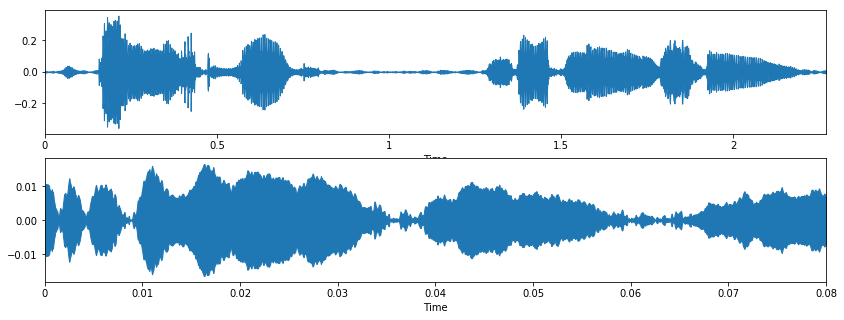

In [113]:
plt.figure(figsize=(14, 5))
plt.subplot(2,1,1)
librosa.display.waveplot(t_y, sr=t_sr)
plt.subplot(2,1,2)
librosa.display.waveplot(t_wav, sr=t_sr)


In [123]:
ipd.Audio(t_y, rate=t_sr) # load a NumPy array


In [124]:
ipd.Audio(t_wav, rate=t_sr) # load a NumPy array


In [76]:
temp_row

Unnamed: 0                       10000
cp                                  cp
fname         soon/s11_brwz9s_soon.jpg
t                                   -t
folder                       test/soon
speaker                            s11
w_pattern                       brwz9s
token                             soon
start                            54750
end                              67000
Name: 10000, dtype: object

In [98]:
transcript_path

'annotation/s11/brwz9s.align'

In [100]:
yourfile = pd.read_csv(transcript_path,nrows=1,header=None)


In [101]:
yourfile

,0
0,0 10750 sil


10750


In [96]:
ls annotation/s11/brwz9s.align


annotation/s11/brwz9s.align


In [87]:
temp_row

Unnamed: 0                       10000
cp                                  cp
fname         soon/s11_brwz9s_soon.jpg
t                                   -t
folder                       test/soon
speaker                            s11
w_pattern                       brwz9s
token                             soon
start                            54750
end                              67000
Name: 10000, dtype: object

In [135]:
# test_with_audio = []
test_df = pd.read_csv("test_speech.csv")
for i in range (len(test_df)):
    temp_row = test_df.iloc(0)[i]
#     print(temp_row)
    audio_path = str(t_path/"speech_25khz"/temp_row['speaker']/ str(temp_row['w_pattern'])) + ".wav"
    out_path = str(t_path/"speech_25khz/"/temp_row['folder']/str(temp_row['speaker']+'_'+temp_row['w_pattern']+'_'+temp_row['token']+'.wav'))
    transcript_path = str(t_path/"annotation"/temp_row['speaker']/ str(temp_row['w_pattern'])) + ".align"
    with open(transcript_path) as myfile:
        head = [next(myfile) for x in range(1)]

    t_head=head[0].split(' ')
    if re.search('sil',t_head[2]):
        sil_offset = int(t_head[1])
    else:
        sil_offset=0
        
    t_y,t_sr = librosa.load(audio_path,sr=None)
    t_wav = t_y[temp_row['start']-sil_offset:temp_row['end']-sil_offset]
    librosa.output.write_wav(out_path, t_wav, t_sr)
#     print(out_path)
#     if i>5:
#         break

In [129]:
ls speech_25khz/test

a/      by/     five/   in/   n/     place/   set/    two/    y/
again/  c/      four/   j/    nine/  please/  seven/  u/      z/
at/     d/      g/      k/    now/   q/       six/    v/      zero/
b/      e/      green/  l/    o/     r/       soon/   white/
bin/    eight/  h/      lay/  one/   red/     t/      with/
blue/   f/      i/      m/    p/     s/       three/  x/


In [138]:
# test_with_audio = []
train_df = pd.read_csv("train_speech.csv")
for i in range (len(train_df)):
    temp_row = train_df.iloc(0)[i]
#     print(temp_row)
    audio_path = str(t_path/"speech_25khz"/temp_row['speaker']/ str(temp_row['w_pattern'])) + ".wav"
    out_path = str(t_path/"speech_25khz/"/temp_row['folder']/str(temp_row['speaker']+'_'+temp_row['w_pattern']+'_'+temp_row['token']+'.wav'))
    transcript_path = str(t_path/"annotation"/temp_row['speaker']/ str(temp_row['w_pattern'])) + ".align"
    with open(transcript_path) as myfile:
        head = [next(myfile) for x in range(1)]

    t_head=head[0].split(' ')
    if re.search('sil',t_head[2]):
        sil_offset = int(t_head[1])
    else:
        sil_offset=0
        
    t_y,t_sr = librosa.load(audio_path,sr=None)
    t_wav = t_y[temp_row['start']-sil_offset:temp_row['end']-sil_offset]
    librosa.output.write_wav(out_path, t_wav, t_sr)
#     print(out_path)
#     if i>5:
#         break